# Keypoint Extraction

#### By Albert Gong

Write keypoints using JSON format instead of YAML. YAML tags require OpenCV.

In [201]:
import json
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from pprint import pprint
import math
from collections import OrderedDict

%matplotlib inline

In [202]:
OPENPOSE_ROOT = '/home/albert/openpose/'

img_file = OPENPOSE_ROOT + 'examples/media/albert/woman.jpg'
pose_file = OPENPOSE_ROOT + 'examples/media/albert/pose/woman_keypoints.json'
render_file = OPENPOSE_ROOT + 'examples/media/albert/render/woman_rendered.png'

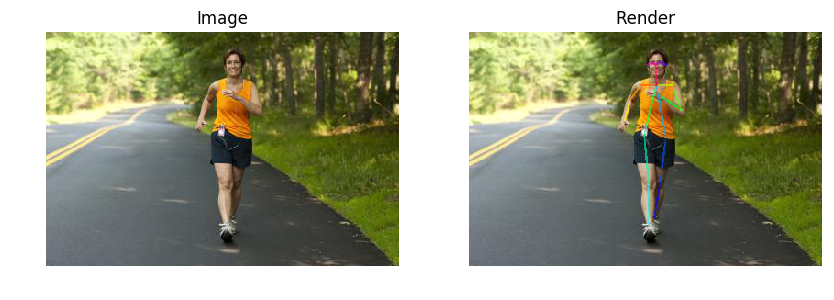

In [203]:
img = misc.imread(img_file)
render = misc.imread(render_file)

plt.figure(figsize=(10,6), dpi=100)

plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('Image')

plt.subplot(122)
plt.imshow(render)
plt.axis('off')
plt.title('Render')

plt.show()

In [204]:
with open(pose_file) as data_file:    
    data = json.load(data_file)

pprint(data)

{u'people': [{u'face_keypoints': [],
              u'hand_left_keypoints': [],
              u'hand_right_keypoints': [],
              u'pose_keypoints': [203.138,
                                  36.2122,
                                  0.927631,
                                  203.834,
                                  58.4489,
                                  0.88429,
                                  186.439,
                                  58.462,
                                  0.852873,
                                  175.328,
                                  75.1257,
                                  0.837863,
                                  169.715,
                                  95.9763,
                                  0.864393,
                                  221.205,
                                  58.4497,
                                  0.836837,
                                  230.963,
                                  85.5502,
              

In [205]:
for p in range(len(data['people'])):
    for k_type in data['people'][p].keys():
        pose_dict = {'x' : [], 'y' : [], 'c' : []}
        
        for i in range(len(data['people'][p][k_type])):
            if i % 3 == 0:
                pose_dict['x'].append(data['people'][p][k_type][i])
            elif i % 3 == 1:
                pose_dict['y'].append(data['people'][p][k_type][i])
            else:
                pose_dict['c'].append(data['people'][p][k_type][i])
        
        data['people'][p][k_type] = pose_dict

### Display Keypoints

In [206]:
BODY_PARTS = [
    "Nose",
    "Neck",
    "RShoulder",
    "RElbow",
    "RWrist",
    "LShoulder",
    "LElbow",
    "LWrist",
    "RHip",
    "RKnee",# Add 10 to remove blown-out artifacts
    "RAnkle",
    "LHip",
    "LKnee",
    "LAnkle",
    "REye",
    "LEye",
    "REar",
    "LEar",
    "Bkg",
]

In [207]:
def dist(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [208]:
img_arr = np.zeros(img.shape, dtype=np.uint8)

In [209]:
print(img_arr.shape)

(256, 385, 3)


In [210]:
r_keypoint = 5

for p in range(len(data['people'])):
    for i in range(len(data['people'][p]['pose_keypoints']['x'])):
        x_key = data['people'][p]['pose_keypoints']['x'][i]
        y_key = data['people'][p]['pose_keypoints']['y'][i]
        c_key = data['people'][p]['pose_keypoints']['c'][i]

        for x in range(img_arr.shape[1]):
            for y in range(img_arr.shape[0]):
                if dist(x, y, x_key, y_key) < r_keypoint:
                    intensity = 255 * c_key
                    img_arr[y][x] = np.array([intensity, intensity, intensity], dtype=np.uint8)

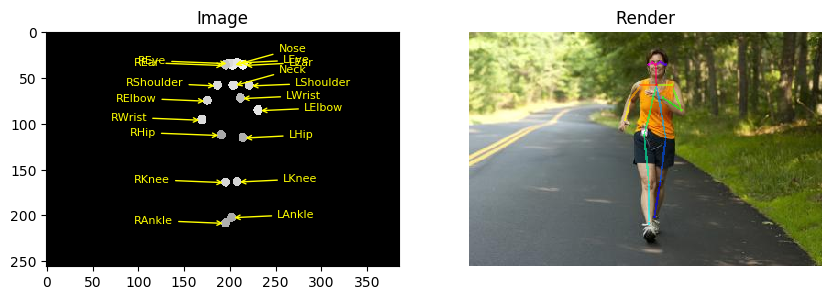

In [211]:
plt.figure(figsize=(10,6), dpi=100)

plt.subplot(121)
plt.imshow(img_arr)
# plt.axis('off')
plt.title('Image')

for p in range(len(data['people'])):
    for i in range(len(data['people'][p]['pose_keypoints']['x'])):
        x_key = data['people'][p]['pose_keypoints']['x'][i]
        y_key = data['people'][p]['pose_keypoints']['y'][i]
        if BODY_PARTS[i][0] == 'R':
            plt.annotate(BODY_PARTS[i], xy=(x_key,y_key), xytext=(x_key - 100, y_key), 
                         fontsize=8, color='yellow',
                         arrowprops={'arrowstyle':'->', 'color':'yellow'})
        elif BODY_PARTS[i][0] =='L':
            plt.annotate(BODY_PARTS[i], xy=(x_key,y_key), xytext=(x_key + 50, y_key), 
                         fontsize=8, color='yellow',
                         arrowprops={'arrowstyle':'->', 'color':'yellow'})
        else:
            plt.annotate(BODY_PARTS[i], xy=(x_key,y_key), xytext=(x_key + 50, y_key - 15), 
                         fontsize=8, color='yellow',
                         arrowprops={'arrowstyle':'->', 'color':'yellow'})

plt.subplot(122)
plt.imshow(render)
plt.axis('off')
plt.title('Render')

plt.show()

In [212]:
data_partition = {u'people': [{u'face_keypoints': {'x': [], 'y': []},
                  u'hand_left_keypoints': {'x': [], 'y': []},
                  u'hand_right_keypoints': {'x': [], 'y': []},
                  u'pose_keypoints': {'x': [], 'y': []}}],
                  u'version': 1.0}

In [213]:
PARTITION_BODY_PARTS = OrderedDict([
    ('RArm', [BODY_PARTS.index('RShoulder'), BODY_PARTS.index('RElbow')]),
    ('RForearm', [BODY_PARTS.index('RElbow'), BODY_PARTS.index('RWrist')]),
    ('LArm', [BODY_PARTS.index('LShoulder'), BODY_PARTS.index('LElbow')]),
    ('LForearm', [BODY_PARTS.index('LElbow'), BODY_PARTS.index('LWrist')]),
    ('Chest', [BODY_PARTS.index('RShoulder'), BODY_PARTS.index('LShoulder')]),
    ('RTorso', [BODY_PARTS.index('Neck'), BODY_PARTS.index('RHip')]),
    ('LTorso', [BODY_PARTS.index('Neck'), BODY_PARTS.index('LHip')]),
    ('RHip', [BODY_PARTS.index('RHip')]),
    ('CHip', [BODY_PARTS.index('RHip'), BODY_PARTS.index('LHip')]),
    ('LHip', [BODY_PARTS.index('LHip')]),
    ('RThigh', [BODY_PARTS.index('RHip'), BODY_PARTS.index('RKnee')]),
    ('LThigh', [BODY_PARTS.index('LHip'), BODY_PARTS.index('LKnee')]),
    ('RShin', [BODY_PARTS.index('RKnee'), BODY_PARTS.index('RAnkle')]),
    ('LShin', [BODY_PARTS.index('LKnee'), BODY_PARTS.index('LAnkle')]),
    ('RFoot', [BODY_PARTS.index('RAnkle')]),
    ('LFoot', [BODY_PARTS.index('LAnkle')]),
    ('Back', [BODY_PARTS.index('RShoulder'), BODY_PARTS.index('LShoulder')]),
])

In [214]:
print(PARTITION_BODY_PARTS)

OrderedDict([('RArm', [2, 3]), ('RForearm', [3, 4]), ('LArm', [5, 6]), ('LForearm', [6, 7]), ('Chest', [2, 5]), ('RTorso', [1, 8]), ('LTorso', [1, 11]), ('RHip', [8]), ('CHip', [8, 11]), ('LHip', [11]), ('RThigh', [8, 9]), ('LThigh', [11, 12]), ('RShin', [9, 10]), ('LShin', [12, 13]), ('RFoot', [10]), ('LFoot', [13]), ('Back', [2, 5])])


In [215]:
for p in range(len(data_partition['people'])):
    for body_pt in PARTITION_BODY_PARTS.keys():
#         Each new key point is an average of the key points listed in the corresponding array in PARTITION_BODY_PARTS
        x_key = np.mean(np.array([data['people'][p]['pose_keypoints']['x'][i] for i in PARTITION_BODY_PARTS[body_pt]]))
        y_key = np.mean(np.array([data['people'][p]['pose_keypoints']['y'][i] for i in PARTITION_BODY_PARTS[body_pt]]))
        data_partition['people'][p]['pose_keypoints']['x'].append(x_key)
        data_partition['people'][p]['pose_keypoints']['y'].append(y_key)

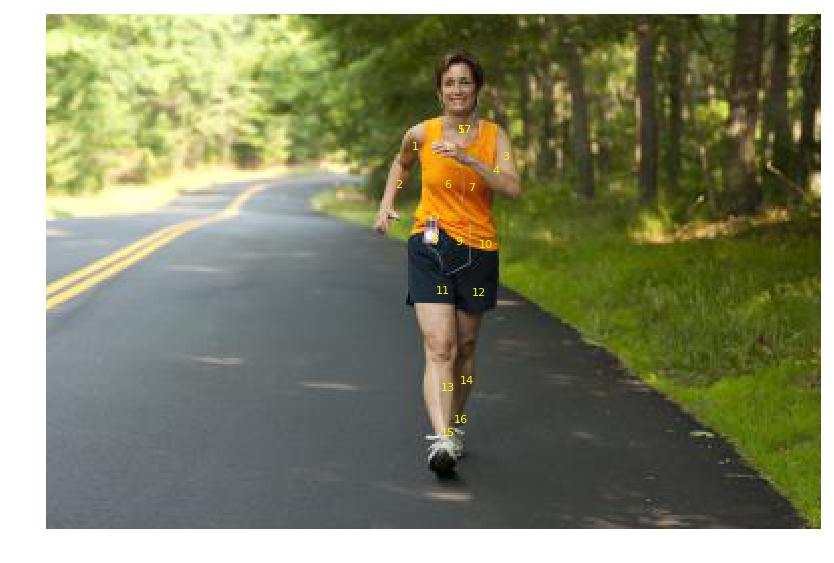

In [217]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(img)
plt.axis('off')
for p in range(len(data_partition['people'])):
    for i in range(len(data_partition['people'][p]['pose_keypoints']['x'])):
        x_key = data_partition['people'][p]['pose_keypoints']['x'][i]
        y_key = data_partition['people'][p]['pose_keypoints']['y'][i]
        
        plt.annotate(i + 1, xy=(x_key,y_key), fontsize=8, color='yellow')

plt.show()